   ### Point annotations

In [1]:
%matplotlib inline
from IPython.display import display, Image

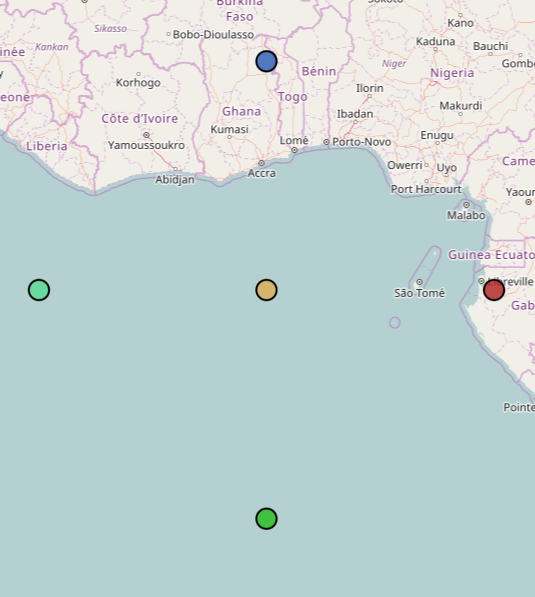

In [2]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589761428d777f07219fcacb/download'

M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

M.add_annotation('point', [0, 0])
M.add_annotation('point', [10, 0], {'rgb': 'firebrick'})
M.add_annotation('point', [-10, 0])
M.add_annotation('point', [0, 10], {'rgb': '#295bb5', 'name': 'spam'})
M.add_annotation('point', [0, -10], {'rgb': '#23be1c', 'name': 'eggs'})

display(Image(EXPECTED, format="png"))

In [3]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'] == ([0, 0],)
assert annotations[1]['kwargs']['rgb'] == 'firebrick'
assert annotations[3]['kwargs']['name'] == 'spam'
annotations

[{'args': ([0, 0],),
  'kwargs': {'id': 1, 'name': 'Point 1', 'rgb': '#dbae57'},
  'type': 'point'},
 {'args': ([10, 0],),
  'kwargs': {'id': 2, 'name': 'Point 2', 'rgb': 'firebrick'},
  'type': 'point'},
 {'args': ([-10, 0],),
  'kwargs': {'id': 3, 'name': 'Point 3', 'rgb': '#57db94'},
  'type': 'point'},
 {'args': ([0, 10],),
  'kwargs': {'id': 4, 'name': 'spam', 'rgb': '#295bb5'},
  'type': 'point'},
 {'args': ([0, -10],),
  'kwargs': {'id': 5, 'name': 'eggs', 'rgb': '#23be1c'},
  'type': 'point'}]

### Rectangle annotations

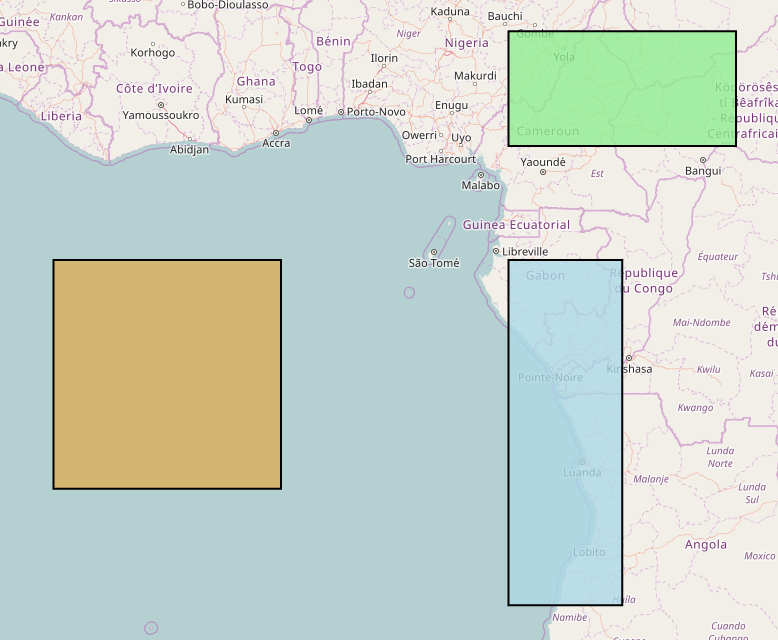

In [4]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589765518d777f07219fcace/download'

M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

M.add_annotation('rectangle', [[0, 0], [0, -10], [-10, -10], [-10, 0]])
M.add_annotation('rectangle', [[10, 5], [10, 10], [20, 10], [20, 5]], {'rgb': 'lightgreen'})
M.add_annotation('rectangle', [[10, 0], [15, 0], [15, -15], [10, -15]], {'rgb': 'lightblue', 'name': 'parrot'})

display(Image(EXPECTED, format="png"))

In [5]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'][0] == [[0, 0], [0, -10], [-10, -10], [-10, 0]]
assert annotations[1]['kwargs']['rgb'] == 'lightgreen'
assert annotations[2]['kwargs']['name'] == 'parrot'
annotations

[{'args': ([[0, 0], [0, -10], [-10, -10], [-10, 0]], None),
  'kwargs': {'id': 6, 'name': 'Rectangle 6', 'rgb': '#dbae57'},
  'type': 'rectangle'},
 {'args': ([[10, 5], [10, 10], [20, 10], [20, 5]], None),
  'kwargs': {'id': 7, 'name': 'Rectangle 7', 'rgb': 'lightgreen'},
  'type': 'rectangle'},
 {'args': ([[10, 0], [15, 0], [15, -15], [10, -15]], None),
  'kwargs': {'id': 8, 'name': 'parrot', 'rgb': 'lightblue'},
  'type': 'rectangle'}]

### Polygon annotations

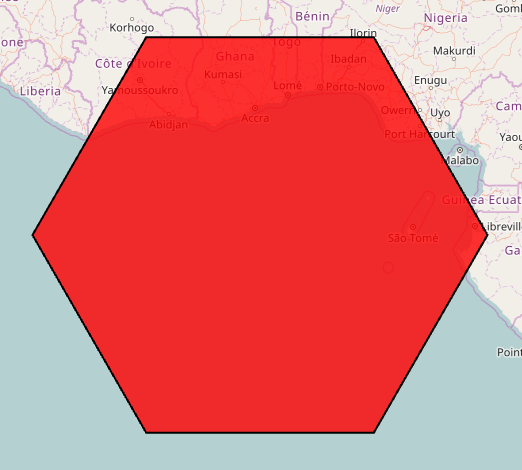

In [6]:
EXPECTED = 'https://data.kitware.com/api/v1/item/589769ba8d777f07219fcad1/download'

from math import sin, cos, radians
M.layers.annotation.clear_annotations()
M.set_center(0, 0, 5)

r = 10
def point(angle):
    angle = radians(angle)
    return [r * cos(angle), r * sin(angle)]

M.add_annotation('polygon', [
    point(60 * i) for i in range(6)
], {'rgb': 'red', 'name': 'stop'})

display(Image(EXPECTED, format="png"))

In [7]:
annotations = M.layers.annotation.serialize()['annotations']
assert annotations[0]['args'][0][0] == [10.0, 0.0]
assert annotations[0]['kwargs']['rgb'] == 'red'
assert annotations[0]['kwargs']['name'] == 'stop'
annotations

[{'args': ([[10.0, 0.0],
    [5.000000000000001, 8.660254037844386],
    [-4.999999999999998, 8.660254037844387],
    [-10.0, 1.2246467991473533e-15],
    [-5.000000000000004, -8.660254037844384],
    [5.000000000000001, -8.660254037844386]],
   None),
  'kwargs': {'id': 9, 'name': 'stop', 'rgb': 'red'},
  'type': 'polygon'}]